# Progetto Analisi Social Networks e Media: Shallow Graph Embedding

di Emilio Casella matr.204898                                                                           A.A 2020/2021

## Premessa: Cosa Significa Graph Embedding?

Informalmente, qualsiasi dataset che contiene nodi e archi può essere rappresentato come un grafo.
I nodi costituiscono le varie entità e gli archi le connessioni tra di esse.
Un Graph Embedding determina una rappresentazione per questi oggetti a dimensione vettoriale fissata, permettendo di preservare la tipologia di una determinata rete e ridurre la dimensionalità rispetto a quella originale.

Si può dividere l’embedding in 2 gruppi:

1) Vertex embedding: si codifica ogni nodo con la sua rappresentazione vettoriale; questo 
incorporamento viene usato quando si desidera eseguire la visualizzazione o la previsione a livello di 
vertice, ad es. visualizzazione di vertici sul piano 2D o la previsione di nuove connessioni basate su 
similitudini di vertici;

2) Graph embedding: si rappresenta l'intero grafo con un singolo vettore per fare previsioni a livello di 
grafo o quando si vuole confrontare o visualizzare tutti i grafi, ad es. confronto di strutture chimiche;

L’embeddings è necessario in quanto un semplice grafo, che utilizza uno specifico gruppo di argomenti 
matematici fisici o statistici, è limitato in questo contesto di utilizzo; al contrario dei vettori, che possono 
essere rimodellati con vari approcci e hanno un set di operazioni decisamente più veloci.

Un altro motivo è che i grafi hanno bisogno di una matrice di adiacenza per i propri nodi e le proprie 
connessioni che, specialmente per quelli con un grande numero di nodi, rappresenta un costo esponenziale 
in termini di memoria.

Al contrario, i vettori racchiudono le info di un gruppo di nodi, in un array di esigue dimensioni.
Un embedding, per essere considerato un buon livello di rappresentazione, deve soddisfare i seguenti 
requisiti:
- Rappresentare necessariamente la topologia del grafo, i suoi nodi, le sue connessioni e i suoi vicini. Le performance di visualizzazione o previsione dipenderanno dal grado di accuratezza;

- La taglia del grafo non deve influenzare le performance del processo di embeddings;

- Bisogna trovare un buon compromesso tra la taglia del grafo e la complessità spaziale causata dalle innumerevoli informazioni da preservare.


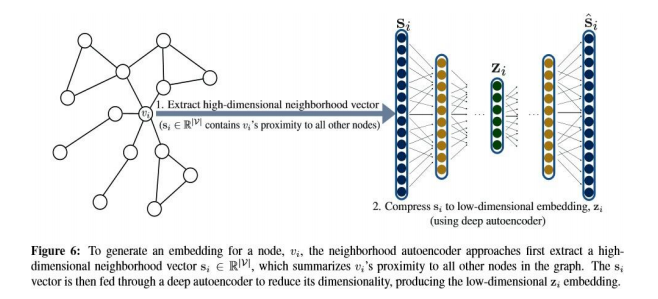

Con l'avvento del Deep Learning, le reti neurali sui grafi hanno avuto un notevole boost prestazionale, permettendo di effettuare previsioni su etichette a livello di nodo, di collegamenti tra nodi etc.

In particolare,le principali funzioni che entrano in gioco sono tipicamente quattro:

1)Funzione di similiarità, misura la somiglianza di due nodi composta dalle tipologie:

   •Prossimità di primo ordine o omofilia: Due nodi che sono collegati;
   
   •Prossimità di secondo ordine:Due nodi che condividono molte connessioni, hanno una prossimità di 
    secondo ordine    maggiore.Nodi 5 e 6 in figura;



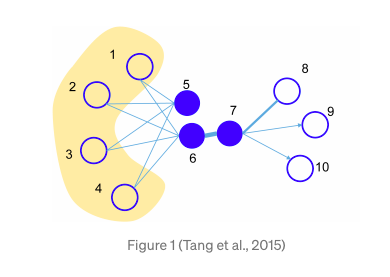


•Equivalenza strutturale: Due nodi sono hanno struttura simile, u ed s6 in figura;

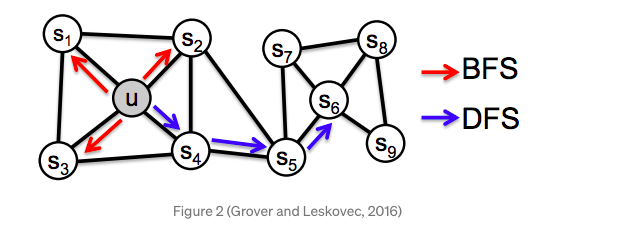

2)Funzione Encoder che genera l'embedding dei nodi;

3)Funzione Decoder che restituisce la similarità a coppie;

4)Funzione di Loss che classifica la bontà della ricostruzione;

In questo elaborato, verrà approfondità un particolare tipo di funzione chiamata Shallow Encoder, tramite l'applicazione del Random Walk.
L'idea chiave consiste nell'effettuare brevi "passeggiate casuali aleatorie", ottenendo rappresentazioni simili per i vari nodi sfruttando un concetto di equivalenza strutturale, come accennato precedentemente.
Questa tecnica ha permesso di ottenere rappresentazioni flessibili e performance migliori.







Una rete che rappresenta al meglio queste caratteristiche è una rete di autoencoder.
Gli autoencoder sono reti neurali con lo scopo di generare nuovi dati dapprima comprimendo l’input in uno 
spazio di variabili latenti e, successivamente, ricostruendo l’output sulla base delle informazioni acquisite. 
Questa tipologia di network è composta da due parti:

- Encoder: la parte della rete che comprime l’input in uno spazio di variabili latenti e che può essere
rappresentato dalla funzione di codifica h=f(x);

- Decoder: la parte che si occupa di ricostruire l’input sulla base delle informazioni precedentemente
raccolte. È rappresentato dalla funzione di decodifica r=g(h).

L’autoencoder nel suo complesso può quindi essere descritto dalla funzione d(f(x)) = r dove r è quanto più
simile all’input originale x.


Perché copiare l’input in output?
Quello che speriamo è che, allenando l’autoencoder a copiare l’input, lo spazio di variabili latenti h possa
assumere delle caratteristiche a noi utili.
Questo può essere ottenuto imponendo dei limiti all’azione di codifica, costringendo lo spazio h a dimensioni 
minori di quelle di x. In questo caso l’autoencoder viene chiamato undercomplete.
Allenando lo spazio undercomplete, portiamo l’autoencoder a cogliere le caratteristiche più rilevanti dei dati 
di allenamento. Se non le diamo sufficienti vincoli, la rete si limita al compito di copiare l’input in output, 
senza estrapolare alcuna informazione utile sulla distribuzione dei dati.
Ciò può accadere anche quando la dimensione del sottospazio latente ha la stessa grandezza dello spazio di 
partenza.

Ad oggi, riduzione del rumore e riduzione della dimensionalità per la visualizzazione dei dati sono considerati 
le applicazioni più interessanti degli autoencoder.


Con l’appropriato settaggio della dimensionalità e dei relativi vincoli sulla dispersione del dato, attraverso gli
autoencoder si possono ottenere proiezioni in sottospazi di interesse maggiore rispetto a metodi lineari.

Gli autoencoder si allenano automaticamente attraverso dati di esempio, rendendo facile allenare la rete in 
modo da performare bene su simili tipologie di input, senza la necessità di generalizzare.
La compressione effettuata su dati simili a quelli utilizzati nel training set avrà dei buoni risultati, viceversa, 
su dati diversi sarà poco efficace.

Queste reti neurali sono allenate a preservare quante più informazioni possibili, quando sono inserite 
nell’encoder e successivamente nel decoder; ma devono anche far sì che le nuove rappresentazioni 
acquisiscano differenti tipi di proprietà.

Idealmente è possibile allenare con successo una qualsiasi architettura basata su autoencoder scegliendo 
opportunamente i parametri e la capacità di ciascun encoder-decoder in base alla complessità del dato da 
modellare.


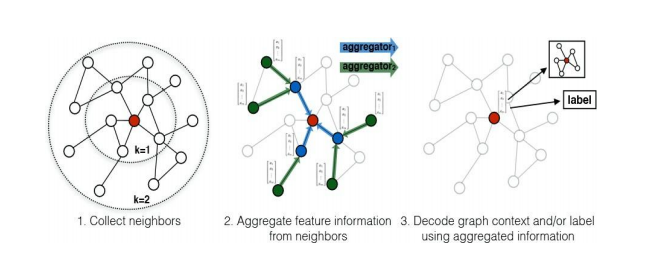

## Analisi del dataset

In [2]:
import matplotlib.pyplot as plt
from ge.classify import read_node_label, Classifier
from ge import DeepWalk,LINE,Node2Vec
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
import seaborn as sns
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import random
from sklearn.pipeline import Pipeline
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator,GraphSAGENodeGenerator,Node2VecLinkGenerator, Node2VecNodeGenerator,FullBatchNodeGenerator
from stellargraph.data import EdgeSplitter
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec, link_classification
from stellargraph.layer import GCN
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from math import isclose
from pandas.core.indexes.base import Index
from sklearn.metrics import accuracy_score
from stellargraph.data import BiasedRandomWalk
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Node2VecLinkGenerator, Node2VecNodeGenerator
from tensorflow import keras
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec
from stellargraph.mapper import GraphSAGELinkGenerator, GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE
from stellargraph.mapper import FullBatchLinkGenerator, FullBatchNodeGenerator
from stellargraph.layer import GCN, LinkEmbedding
from stellargraph import globalvar
from tensorflow import keras
from stellargraph import datasets
from sklearn.preprocessing import StandardScaler
import stellargraph as sg
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Le implementazioni degli algoritmi sottostanti sono ottenute tramite il pacchetto https://github.com/shenweichen/GraphEmbedding, opportunamente aggiornato e adattato alle esigenze progettuali; insieme all'utilizzo della libreria Stellargraph https://stellargraph.readthedocs.io/en/stable/index.html  nella versione stabile 1.2.1.

Il dataset utilizzato è CoRa, implementato nella libreria Stellargraph, che consiste i pubblicazioni di riviste di Deep Learning.
Il set di dati Cora è costituito da 2708 pubblicazioni scientifiche divise in sette classi. 
La rete di citazioni è composta da 5429 link. 
Ogni pubblicazione nel set di dati è descritta da un vettore di parole con valore 0/1 che indica l'assenza/presenza della parola corrispondente dal dizionario. Il dizionario è composto da 1433 parole uniche. 

In [4]:
dataset = datasets.Cora()
dataset.download()
G, node_subjects = dataset.load()
nodes = list(G.nodes())
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


A partire dal grafo precedente, sono stati ricavati 2 file txt presenti nel pacchetto data\cora contenuto nella libreria github allegata al notebook.

Il primo file contiene la lista degli archi in formato nodo target --> nodo source, mentre 

In [29]:
pd.read_csv("/Users/emiliocasella/GraphEmbedding/data/cora/cora_edges.txt",delimiter=" ",names=["target","source"])

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


Il secondo tiene traccia dell'etichettatura di ogni nodo, nel formato nodo --> etichetta (rappresentata con un numero da 0 a 6).

In [27]:
pd.read_csv("/Users/emiliocasella/GraphEmbedding/data/cora/cora_labels.txt",delimiter=" ",names=["nodo","etichetta"])

,nodo,etichetta
0,31336,2
1,1061127,5
2,1106406,4
3,13195,4
4,37879,3
...,...,...
2703,1128975,1
2704,1128977,1
2705,1128978,1
2706,117328,0


Il tutto serve a dare in pasto i medesimi dati anche ad oggetti che non hanno la capacità di elaborare un grafo in formato stellargraph (in questo caso DeepWalk, Node2Vec 1 e LINE) ma necessitano della lettura di due file separati contenenti i nodi e gli archi; e in fase successiva procedono alla creazione di un grafo tramite la libreria networkx.

# Fase 1: Deep Walk vs Node2Vec vs LINE vs GraphSage

In questa prima fase, viene effettuato un confronto sulla previsione del target dei nodi del dataset CoRa, contenente 7 diverse tipologie di etichette, qui identificate per semplicità con numeri da 0 a 6.

L'apprendimento è effettuato sull'80% del dataset, riservandone un 20% al test set; utilizzando la regressione logistica per effettuare le previsioni tramite l'embedding ottenuto.

Si precisa inoltre che, ai fini di ottenere un'analisi veloce sui vari algoritmi, la 10 fold cross validation non viene utilizzata in questa fase; impostando, inoltre, il settaggio dei parametri per ogni algoritmo suggerito dalle librerie in esame.

## Deep Walk

Il primo algoritmo utilizzato è Deep Walk, che sfrutta il Random Walk e l'algoritmo Word2vec per la creazione dell'embedding.

### Word2Vec

Word2vec consiste in una traduzione di parole o frasi in vettori composti da numeri reali.
Questi modelli non sono altro che delle reti neurali a due livelli che sono addestrate (tramite un approccio 
non supervisionato) per ricostruire i contesti linguistici delle parole. 

Word2Vec prende come input un grande frammento di testo e costruisce uno spazio vettoriale, tipicamente di diverse centinaia di dimensioni, in cui ogni parola è univocamente assegnata ad un corrispondente vettore nello spazio,seguendo un certo criterio. 
Infatti, i vettori (rappresentanti le parole) vengono posizionati nello spazio cosicché le parole che risultino 
"simili" all’interno del frammento di testo siano collocate vicine tra loro nello spazio stesso.

L’idea è quella di riuscire ad incapsulare relazioni differenti tra le parole come, ad esempio, sinonimi, contrari
o analogie. Word2Vec fa uso di un trucco tipicamente usato nel machine learning: addestrare
una semplice rete neurale - con un singolo livello di nodi di hidden - ad effettuare un certo task, che però poi 
non sarà quello per cui verrà effettivamente usata la rete neurale. Un esempio noto è quello che riguarda la 
compressione di un vettore: si fa uso, dell’apprendimento non supervisionato per addestrare la rete neurale 
a comprimere (nel livello di hidden), un vettore dato come input,successivamente decompresso nuovamente 
(nel livello di ouput) riottenendo l’originale. Dopo l’addestramento, il livello di output (ovvero lo step di 
decompressione) può essere scartato mantenendo solo i livelli di input e di hidden.

Esistono due metodologie per poter creare il modello:

• Skip-Gram model: si prendono coppie di parole dal testo e si addestra una rete neurale con un livello 
di nodi di hidden sulla base del finto task in cui, a partire da una parola in input, la rete restituisce la 
distribuzione di probabilità delle parole vicine (all’interno del testo) all’input. In altre parole, la rete restituirà 
alte probabilità per le parole che tipicamente compaiono "vicine" alla parola in input. Essendo un finto task 
però, ad essere realmente importanti saranno i pesi tra i nodi di input e i nodi di hidden che saranno usati 
come word embedding. Quindi se lo strato di hidden possiede 300 neuroni, la rete restituirà un vettore di 
dimensione pari a 300, per ciascuna parola;

• A continuous bag of words (CBOW): fa uso di una rete neurale con un livello di nodi di hidden. Il 
finto task in questo caso è basato sul predire una parola centrale, a partire da un insieme di parole di input 
(appartenenti allo stesso contesto); saranno poi i pesi tra il livello di input e di hidden ad essere usati come 
word embeddings per i termini dati in ingresso alla rete.


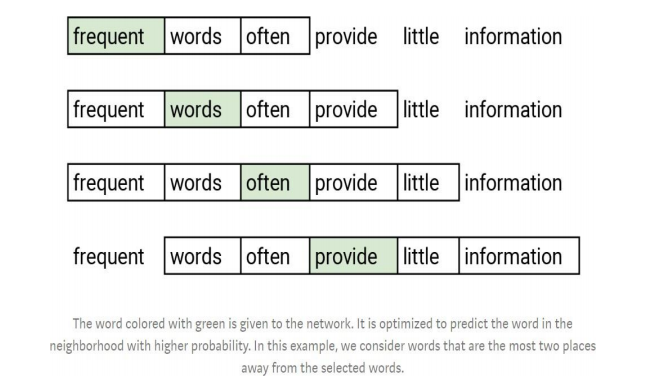

La rete neurale skip-gram vista nella figura seguente ha un livello di input, un livello nascosto e un livello di 
output; accetta le parole con una codifica one-hot ovvero un vettore con lunghezza uguale a quella del 
dizionario delle parole e con tutti zeri tranne un elemento posto ad uno (punto in cui appare una parola 
codificata nel dizionario). Il livello nascosto non ha alcuna funzione di attivazione, il suo output presenta un 
incorporamento della parola. Il livello di output è un classificatore softmax che predice le parole di vicinato.

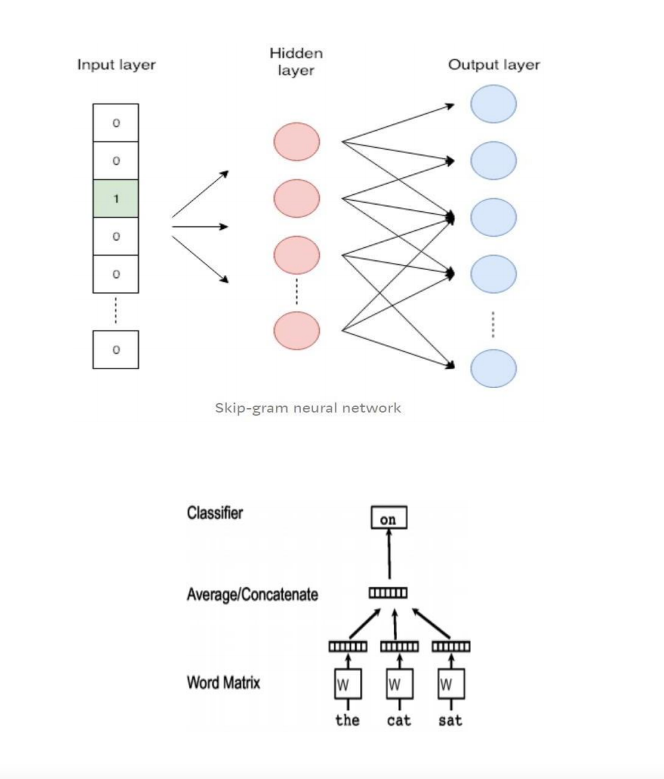

Ritornando ora a DeepWalk, si genera un numero fisso k di passegiate casuali, a partire da ciscun nodo.

La lunghezza di ogni passeggiata è predeterminata. Quindi, quando questa fase è terminata, otteniamo k sequenze di nodi di lunghezza l. L'essenza della generazione di random walk è che nodi adiacenti sono simili e dovrebbero avere incorporamenti simili.

La frequenza di co-occorrenza nelle passeggiate casuali è un indicatore della somiglianza dei nodi. Si noti che questa è un'assunzione ragionevole poiché gli archi, per progettazione, denotano principalmente nodi simili o interagenti in una rete. 

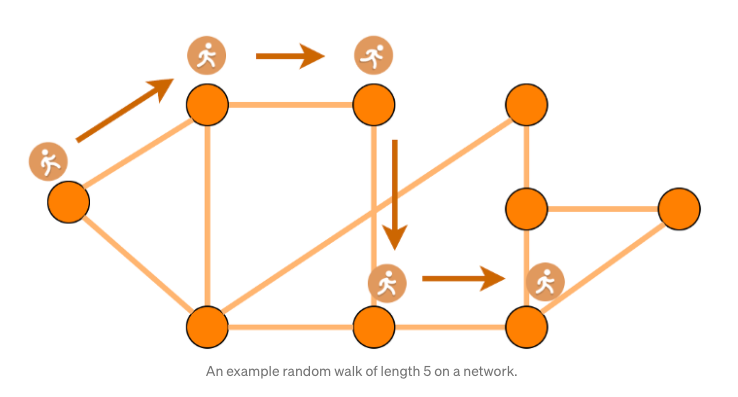

Più k viene aumentato, più la rete viene esplorata, producendo più passeggiate casuali. 
Al contrario, aumentando l, i cammini diventano più lunghi e i nodi più distanti vengono accettati come nodi simili. Ciò corrisponde a ridurre il vincolo di somiglianza e può introdurre co-occorrenze rumorose e fuorvianti. 

Possiamo pensare a ogni passeggiata prodotta nel passaggio precedente come un contesto o una finestra di parole in un testo. Pertanto, possiamo massimizzare le somiglianze degli incorporamenti di nodi che si verificano nelle stesse passeggiate.

In questo senso, le sequenze di nodi nelle reti corrispondono alle sequenze di parole nel testo.
Per apprendere gli embedding si utilizza SkipGram.

In primo luogo vengono generati i vettori casuali di dimensione d per ciascun nodo. 

In secondo luogo, si itera sull'insieme di passeggiate casuali e si aggiorna l'embedding dei nodi mediante la discesa del gradiente per massimizzare la probabilità dei vicini di un nodo, dato il nodo stesso; tramite la funzione softmax.

Quando tutti i percorsi sono stati elaborati, possiamo continuare l'ottimizzazione con passaggi aggiuntivi sullo stesso set di percorsi o generare nuovi percorsi sulla rete. 

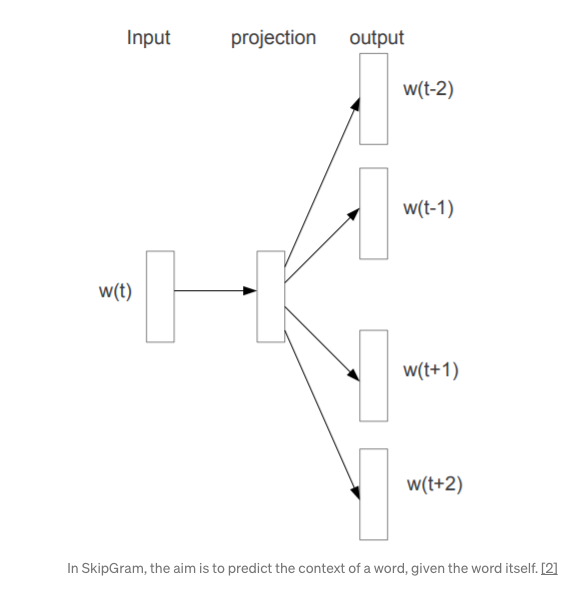

Ricapitolando, tramite DeepWalk si sfrutta la morfologia della rete per la rappresentazioni dei nodi. 
SkipGram cerca di massimizzare le somiglianze dei nodi vicini, i nodi condividono le informazioni tra loro. Ciò significa che arricchiamo il nostro set di funzionalità esistente con incorporamenti di nodi che sono stati appresi in modo auto-supervisionato.


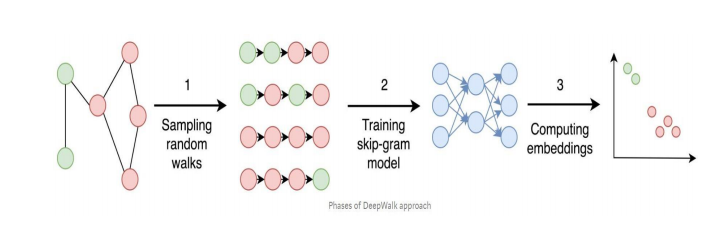



Tuttavia, è bene precisare che questo ragionamento, in alcune situazioni, può indurre il nostro classificatore in errore, introducendo info talvolta irrilevanti e non prove di fondatezza.

Si noti come Deep Walk raggiunge un'accuratezza di circa il 65% sulla previsione dei target (e come il tutto si rifletta anche sulle metriche successive), potendo osservare tramite le tabelle sottostanti, come questi si comporta su ogni singola classe del dataset.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.6s remaining:    7.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 80.00% nodes...
Accuracy:  0.6439114391143912
-------------------
              precision    recall  f1-score   support

           0       0.68      0.56      0.62        57
           1       0.73      0.65      0.69        88
           2       0.58      0.82      0.68       153
           3       0.67      0.61      0.64        89
           4       0.74      0.56      0.64        41
           5       0.78      0.45      0.57        40
           6       0.62      0.54      0.58        74

   micro avg       0.64      0.64      0.64       542
   macro avg       0.68      0.60      0.63       542
weighted avg       0.66      0.64      0.64       542
 samples avg       0.64      0.64      0.64       542

-------------------


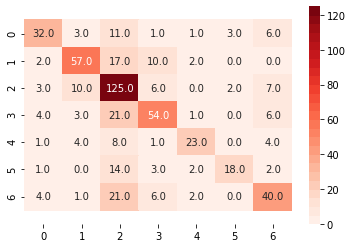

-------------------


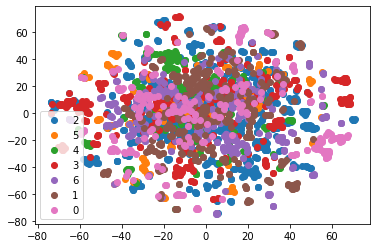

In [4]:
def evaluate_embeddings(embeddings):
    X, Y = read_node_label('./GraphEmbedding/data/cora/cora_labels.txt')
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)


def plot_embeddings(embeddings):
    X, Y = read_node_label('./GraphEmbedding/data/cora/cora_labels.txt')
    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)
    plt.legend()
    plt.show()

G = nx.read_edgelist('./GraphEmbedding/data/cora/cora_edges.txt',
                         create_using=nx.DiGraph(), nodetype=None, data=[('weight', int)])
model = DeepWalk(G, walk_length=10, num_walks=80, workers=4)
model.train(window_size=5, iter=3)
embeddings = model.get_embeddings()
evaluate_embeddings(embeddings)
plot_embeddings(embeddings)

La rappresentazione ottenuta si può ammirare nel grafico sovrastante.
Viene effettuata una esplorazione sul dataset che, come si ci aspettava dalla teoria, non ha una grande capacità di raggruppamento per nodi con le medesime etichette.

## Node2Vec

L’algoritmo node2vec appartiene al gruppo di algoritmi vertex embeddings.
La sua base è caratterizzata da un approccio di tipo DeepWalk, ovvero un’applicazione del classico random
walk alle reti di apprendimento.

Il problema principale del DeepWalk, però, risiede nel fatto di non riuscire a preservare una buona “memoria”
dei nodi vicini a causa del suo modo di operare.

Risulta, quindi, un algoritmo molto flessibile che garantisce un buon controllo sullo spazio di ricerca in esame
tramite l’utilizzo di semplici parametri che orientano le strategie del cammino nella rete.
Gli algoritmi di ricerca più utilizzati per esplorare i nodi vicini sono il Breadth-first (il vicinato è ristretto ai nodi 
più vicini a quello in esame) e il Depth-first (esplora i nodi per distanze incrementali rispetto al nodo in 
esame).

Applicando un approccio basato sul random walk a quest’ultimi, si riescono ad ottenere buoni vantaggi in 
termini computazionali e spaziali.

Si noti che Node2vec combina sia BFS che DFS per apprendere gli incorporamenti dei nodi. 


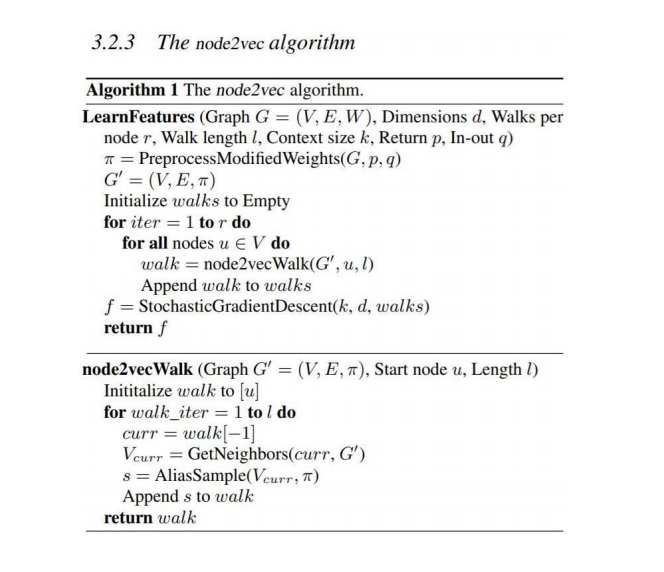


Ricapitolando, Node2vec è una modifica di DeepWalk con una piccola differenza nelle “passeggiate casuali”.


Il parametro Q definisce quanto è probabile che la “camminata casuale” rilevi la parte sconosciuta del grafo, 
mentre il parametro P definisce quanto è probabile che la camminata casuale ritorni al nodo precedente. Il 
parametro P controlla in maniera microscopica i nodi attorno a quello in esame, mentre Q controlla in 
maniera macroscopica il vicinato.

Utilizzando questo algoritmo, come anticipato a livello teorico, si migliora di circa il 5% l'accuratezza del classificatore, con le restanti metriche, rispetto a Deep Walk.

Tutto ciò si riflette in una miglioria della previsione di ogni singola classe.

Preprocess transition probs...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.0s remaining:    7.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.3s finished


Learning embedding vectors...
Learning embedding vectors done!
Training classifier using 80.00% nodes...
Accuracy:  0.6937269372693727
-------------------
              precision    recall  f1-score   support

           0       0.74      0.56      0.64        57
           1       0.74      0.69      0.72        88
           2       0.57      0.88      0.69       153
           3       0.79      0.70      0.74        89
           4       0.93      0.61      0.74        41
           5       0.74      0.50      0.60        40
           6       0.84      0.57      0.68        74

   micro avg       0.69      0.69      0.69       542
   macro avg       0.77      0.64      0.69       542
weighted avg       0.73      0.69      0.69       542
 samples avg       0.69      0.69      0.69       542

-------------------


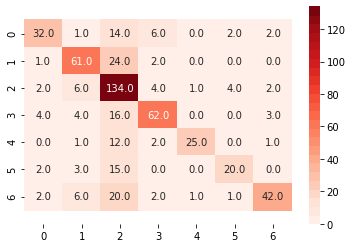

-------------------


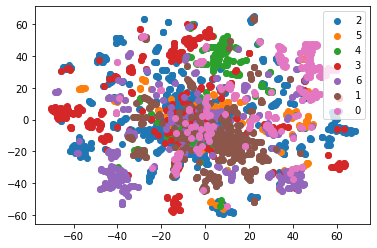

In [3]:
def evaluate_embeddings(embeddings):
    X, Y = read_node_label('./GraphEmbedding/data/cora/cora_labels.txt')
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)


def plot_embeddings(embeddings,):
    X, Y = read_node_label('./GraphEmbedding/data/cora/cora_labels.txt')
    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)
    plt.legend()
    plt.show()
    
    
    
G = nx.read_edgelist('./GraphEmbedding/data/cora/cora_edges.txt',
                         create_using=nx.DiGraph(), nodetype=None, data=[('weight', int)])
model = Node2Vec(G, walk_length=10, num_walks=80,
                     p=0.25, q=4, workers=4, use_rejection_sampling=0)
model.train(window_size = 5, iter = 3)
embeddings=model.get_embeddings()
evaluate_embeddings(embeddings)
plot_embeddings(embeddings)

Le migliorie implementate rispetto a Deep Walk, si riflettono anche nel grafico sovrastante, in quanto si inizia a intravedere un leggero raggruppamento in base all'etichetta del nodo.

## LINE

L'algoritmo LINE o meglio Large-scale Information Network Embedding, utilizza la prossimità di primo ordine e secondo ordine per apprendere gli incorporamenti dei nodi.

Per minimizzare la funzione obiettivo della prossimità di primo ordine, i nodi connessi saranno vicini tra loro nell'embedding, permettendo una rappresentazione k-dimensionale.


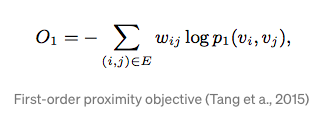

Si noti che è applicabile solo per un grafo non orientato.

Un ragionamento analogo si applica anche alla prossimità di secondo ordine, raggrupando i nodi che hanno un certo numero di vicini in comune.

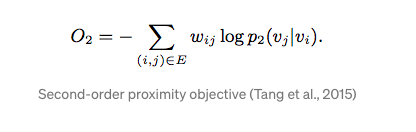

Pertanto, LINE è concettualmente correlato a Node2vec e DeepWalk in quanto utilizza un decodificatore e una loss probabilistici, ma utilizza la similarità di primo e secondo ordine, invece di combinare
loro in passeggiate aleatorie casuali di lunghezza fissata. 

Potenziali problematiche di questo algoritmo nascono nella rappresentazione di nodi con basso grado oppure nella rappresentazione di nuovi nodi.

Entrambe possono essere mitigate con alcuni accorgimenti, infatti LINE utilizza una strategia di ricerca in profondità (DFS) per tutti i nodi e una strategia di ricerca in ampiezza (BFS) rispettivamente sui nodi di basso grado. 



Al fine di ottenere le prestazioni migliori, l'implementazione di LINE utilizza una combinazione di entrambe le similarità (e non ognuna separatamente).


Si noti che rispetto a Node2Vec, si ottiene un miglioramento di circa il 2% sull'accuratezza del classificatore e sulle metriche derivate.

Tutto ciò si riflette in una miglioria della previsione di ogni singola classe con leggero aumento di tutti gli score correlati.

Training classifier using 80.00% nodes...
Accuracy:  0.7158671586715867
-------------------
              precision    recall  f1-score   support

           0       0.77      0.60      0.67        57
           1       0.83      0.84      0.84        88
           2       0.61      0.82      0.70       153
           3       0.73      0.69      0.71        89
           4       0.96      0.66      0.78        41
           5       0.79      0.47      0.59        40
           6       0.69      0.64      0.66        74

   micro avg       0.72      0.72      0.72       542
   macro avg       0.77      0.67      0.71       542
weighted avg       0.73      0.72      0.71       542
 samples avg       0.72      0.72      0.72       542

-------------------


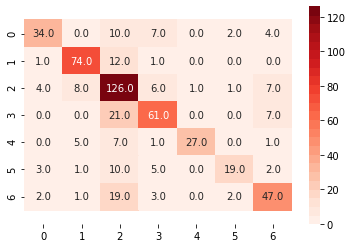

-------------------


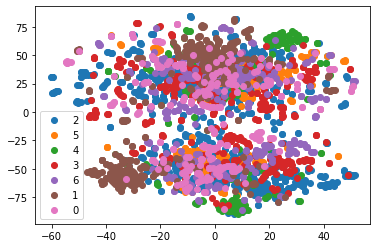

In [9]:
def evaluate_embeddings(embeddings):
    X, Y = read_node_label('./GraphEmbedding/data/cora/cora_labels.txt')
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)


def plot_embeddings(embeddings,):
    X, Y = read_node_label('./GraphEmbedding/data/cora/cora_labels.txt')
    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)
    plt.legend()
    plt.show()



G = nx.read_edgelist('./GraphEmbedding/data/cora/cora_edges.txt',
                         create_using=nx.DiGraph(), nodetype=None, data=[('weight', int)])
model = LINE(G, embedding_size=128, order='all')
model.train(batch_size=1024, epochs=50, verbose=2)
embeddings = model.get_embeddings()
evaluate_embeddings(embeddings)
plot_embeddings(embeddings)

I ragionamenti precedenti, si riflettono nel grafico sovrastante, che effettua due macro raggruppamenti contenenti le varie tipologie di nodi con stessa etichetta abbastanza vicini tra di loro.

## GraphSage

GraphSAGE è un algoritmo che, a differenza di altri modelli, non addestra incorporamenti di nodi specifici ma addestra un aggregatore. A causa di questa natura, può gestire nodi invisibili.
Questo approccio include due passaggi principali che sono il campionamento dei nodi vicini e l'aggregazione.

1) Si sceglie un nodo insieme ad alcuni gruppi di vicini in ogni livello;

2) Si Raccolgono le informazioni inerenti ai vicini e si aggregano;

3) Si esegue un analisi del contesto e si predice l'etichetta;

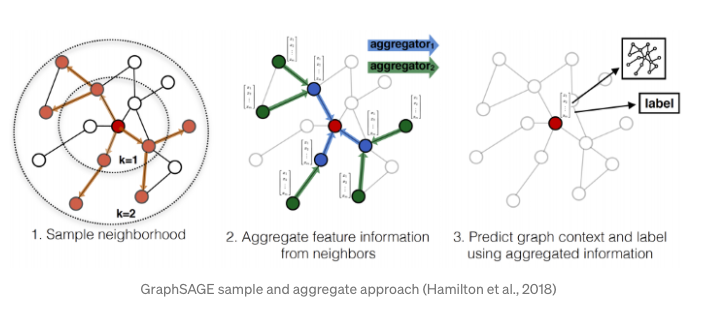

Si utilizza, quindi, una sorta di mini-batch per l'addestramento, campionando solo alcuni vicini tramite il Random Walk.

Esistono quattro modi per aggregare i nodi:

1) Mean Aggregator: si prende la media del vicino e si concatena con il nodo target;

2) GCN Aggregator: si calcola la media dopo la concatenazione di nodi adiacenti. 
La sequenza è invertita rispetto ad un aggregatore medio (migliori performance teoriche);

3) LSTM Aggregator: Si dispongono casualmente i vicini e si utilizza LSTM;

4) Pooling Aggregator: Si utilizza il percettone multistrato (MLP) e si esegue il max-pooling;



Quest'ultima tipologia di aggregatore è utilizzata per la prima implementazione del codice sottostante nella libreria Stellargraph.

E' palese notare come le performance di accuratezza, insieme a tutte le metriche che ne derivano, migliorano di circa l'8% rispetto alla proposta precedente, rappresentando il migliore algoritmo in questa fase di analisi.

In [4]:
def createAndTrain_GraphSageModel(batch_size,epochs,num_samples,layer_sizes):
    number_of_walks = 1
    length = 5
    unsupervised_samples = UnsupervisedSampler(
        G, nodes=nodes, length=length, number_of_walks=number_of_walks
    )
    generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
    train_gen = generator.flow(unsupervised_samples)
    graphsage = GraphSAGE(
        layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
    )
    x_inp, x_out = graphsage.in_out_tensors()
    prediction = link_classification(
        output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
    )(x_out)
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
    )
    history = model.fit(
        train_gen,
        epochs=epochs,
        verbose=1,
        use_multiprocessing=False,
        workers=4,
        shuffle=True,
    )
    return x_inp,x_out
    
def evalutate_embeddings_GS(x_inp,x_out,batch_size,num_samples,alpha,number):
    x_inp_src = x_inp[0::2]
    x_out_src = x_out[0]
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_ids = node_subjects.index
    node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)
    node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)
    node_subject = node_subjects.astype("category").cat.codes
    X = node_embeddings
    if X.shape[1] > 2:
        transform = TSNE  
        trans = transform(n_components=2)
        emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
        emb_transformed["label"] = node_subject
    else:
        emb_transformed = pd.DataFrame(X, index=node_ids)
        emb_transformed = emb_transformed.rename(columns={"0": 0, "1": 1})
        emb_transformed["label"] = node_subject
    X = node_embeddings
    if(number==0):
        y = np.array(node_subject)
    else:
        y = np.array(node_subjects)
    if(number==0):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.8, test_size=0.2, stratify=y
        )
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.1, test_size=None)  
    if(number==0):
        clf = LogisticRegression(verbose=0, solver="lbfgs", multi_class="auto")
    else:
        clf = LogisticRegressionCV(Cs=10, cv=10, scoring="accuracy", verbose=False, multi_class="ovr", max_iter=700)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    print("Accuracy: ",score)
    print('-------------------')
    print(classification_report(y_test,y_pred))
    print('-------------------')
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', cmap=sns.color_palette("Reds", 25))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('-------------------')
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(
        emb_transformed[0],
        emb_transformed[1],
        c=emb_transformed["label"].astype("category"),
        cmap="jet",
        alpha=alpha,
    )
    ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
    plt.title(
        "{} GraphSAGE embeddings for cora dataset".format(transform.__name__)
    )
    plt.show()

link_classification: using 'ip' method to combine node embeddings into edge embeddings
Epoch 1/4
434/434 [==============================] - 45s 99ms/step - loss: 0.5954 - binary_accuracy: 0.6997
Epoch 2/4
434/434 [==============================] - 42s 97ms/step - loss: 0.5416 - binary_accuracy: 0.7742
Epoch 3/4
434/434 [==============================] - 39s 89ms/step - loss: 0.5362 - binary_accuracy: 0.7832
Epoch 4/4
55/55 [==============================] - 2s 29ms/step
Accuracy:  0.7915129151291513
-------------------
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        60
           1       0.87      0.94      0.90        84
           2       0.80      0.85      0.83       164
           3       0.86      0.71      0.77        85
           4       0.71      0.70      0.71        43
           5       0.77      0.75      0.76        36
           6       0.68      0.69      0.68        70

    accuracy                           0.

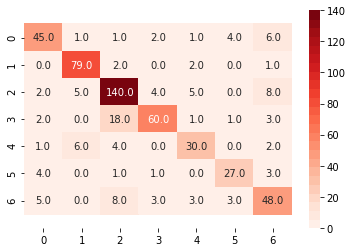

-------------------


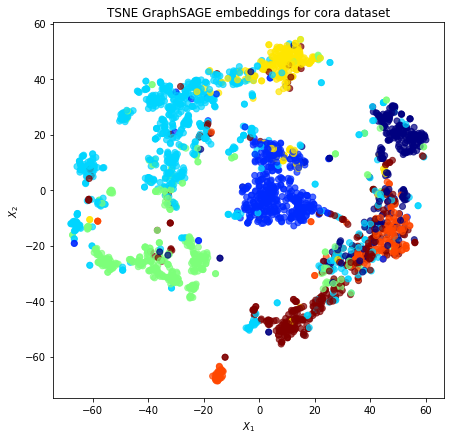

In [19]:
x_inp,x_out=createAndTrain_GraphSageModel(50,4,[10, 5],[50, 50])
evalutate_embeddings_GS(x_inp,x_out,50,[10, 5],0.7,0)

Il grafico precedente, mostra come questo algoritmo adoperi in maniera abbastanza corretta, aggregando bene nodi con etichette uguali.

# Fase 2: Node2Vec (Stellargraph) vs Attri2Vec vs GraphSage vs GraphSageGCN

Si passa ora ad un'analisi più approfondità dell'algoritmo GraphSage, confrontandolo con diverse tipologie di algoritmi ottimizzati.

In particolar modo, si utilizza sempre come metrica una predizione sull'etichetta dei nodi ma con diversi settaggi.

Si utilizza solo il 10% del dataset in fase di apprendimento; inoltre, per ottenere le metriche desiderate, si utilizza una 10 fold cross validation in pasto alla regressione logistica.

Nonostante sia una libreria ottimizzata,la validazione incrociata  ci mostra che i risultati ottenuti per Node2Vec sono in linea con l'implementazione precedentemente, ottenendo comunque una visualizzazione migliore della divisione dei nodi per etichetta.

In [5]:
from stellargraph.layer import Node2Vec

def createAndTrain_N2Vec(walk_number,walk_length,batch_size,epochs,emb_size):
    walker = BiasedRandomWalk(
    G,
    n=walk_number,
    length=walk_length,
    p=0.5,  
    q=2.0,  
    )
    unsupervised_samples = UnsupervisedSampler(G, nodes=list(G.nodes()), walker=walker)
    generator = Node2VecLinkGenerator(G, batch_size)
    node2vec = Node2Vec(emb_size, generator=generator)
    x_inp, x_out = node2vec.in_out_tensors()
    prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="dot")(x_out)
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy],
    )
    history = model.fit(
    generator.flow(unsupervised_samples),
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
    )
    return x_inp,x_out

def evalutate_embeddings_N2V(x_inp,x_out,batch_size,alpha):
    x_inp_src = x_inp[0]
    x_out_src = x_out[0]
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_gen = Node2VecNodeGenerator(G, batch_size).flow(node_subjects.index)
    node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)
    transform = TSNE  
    trans = transform(n_components=2)
    node_embeddings_2d = trans.fit_transform(node_embeddings)
    X = node_embeddings
    y = np.array(node_subjects)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=None)
    clf = LogisticRegressionCV(Cs=10, cv=10, scoring="accuracy", verbose=False, multi_class="ovr", max_iter=500)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    print("Accuracy: ",score)
    print('-------------------')
    print(classification_report(y_test,y_pred))
    print('-------------------')
    label_map = {l: i for i, l in enumerate(np.unique(node_subjects))}
    node_colours = [label_map[target] for target in node_subjects]
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', cmap=sns.color_palette("Reds", 25))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('-------------------')
    plt.figure(figsize=(7, 7))
    plt.axes().set(aspect="equal")
    plt.scatter(
        node_embeddings_2d[:, 0],
        node_embeddings_2d[:, 1],
        c=node_colours,
        cmap="jet",
        alpha=alpha,
    )
    plt.title("{} Node2Vec embeddings for cora dataset".format(transform.__name__))
    plt.show()

link_classification: using 'dot' method to combine node embeddings into edge embeddings
Epoch 1/2
43328/43328 [==============================] - 309s 7ms/step - loss: 0.4352 - binary_accuracy: 0.7558
Epoch 2/2
55/55 [==============================] - 0s 3ms/step
Accuracy:  0.6862182116488925
-------------------
                        precision    recall  f1-score   support

            Case_Based       0.63      0.67      0.65       262
    Genetic_Algorithms       0.86      0.85      0.86       383
       Neural_Networks       0.69      0.74      0.71       744
 Probabilistic_Methods       0.57      0.71      0.63       374
Reinforcement_Learning       0.78      0.66      0.72       190
         Rule_Learning       0.69      0.44      0.53       165
                Theory       0.61      0.49      0.55       320

              accuracy                           0.69      2438
             macro avg       0.69      0.65      0.66      2438
          weighted avg       0.69      0.69  

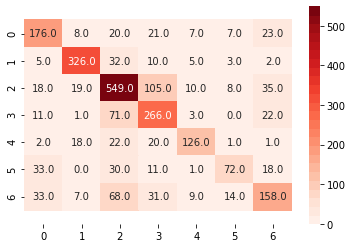

-------------------


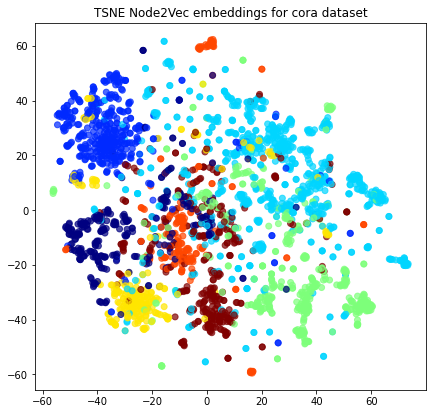

In [6]:
x_inp,x_out=createAndTrain_N2Vec(100,5,50,2,128)
evalutate_embeddings_N2V(x_inp,x_out,50,0.7)

## Attri2Vec

Attri2vec apprende le rappresentazioni dei nodi eseguendo una mappatura lineare/non lineare sugli attributi del contenuto del nodo. 

Per fare in modo che le rappresentazioni dei nodi apprese rispettino la similarità strutturale, viene utilizzato il meccanismo di apprendimento tipico di DeepWalk/Node2Vec.

Per ogni coppia di nodi (target, context) esplorata tramite la passeggiata aleatoria, attri2vec apprende la rappresentazione per il nodo target e la utilizza per prevedere l'esistenza del nodo di contesto, tramite il layer a tre strati ammirabile della figura sottostante.

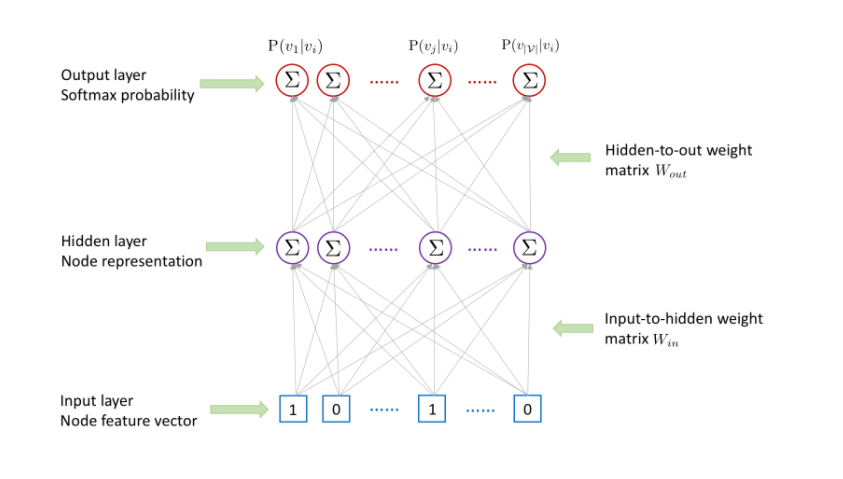

La rappresentazione del nodo nell'hidden layer si ottiene moltiplicando il vettore contenente le info di contesto relative al nodo non elaborato nel livello di input con la matrice dei pesi nascosti 𝑊𝑖𝑛 seguita da una funzione di attivazione. 

La probabilità di esistenza di ogni nodo condizionata dalle info relative al nodo 𝑣𝑖 viene restituita nel livello di output, che si ottiene moltiplicando la rappresentazione del livello nascosto di con la matrice di peso nascosta 𝑊𝑜𝑢𝑡 seguita da un'attivazione softmax. 
Per catturare la relazione target-contesto tra 𝑣𝑖 e 𝑣𝑗, dobbiamo massimizzare la probabilità P(𝑣𝑗|𝑣𝑖). Tuttavia, il calcolo di P(𝑣𝑗|𝑣𝑖) richiede tempo, il che implica la moltiplicazione della matrice tra la rappresentazione dello strato nascosto e la matrice del peso nascosto 𝑊𝑜𝑢𝑡.

Per velocizzare il calcolo, si adotta la strategia di campionamento negativo. 

Per ogni coppia di nodi (target, context), campioniamo un nodo negativo 𝑣𝑘, non ricavabile dal contesto di 𝑣𝑖. Per ottenere l'output, invece di moltiplicare la rappresentazione dello strato nascosto con la matrice di peso  𝑊𝑜𝑢𝑡 seguita da un'attivazione softmax, calcoliamo solo il prodotto scalare tra la rappresentazione dello strato nascosto  e la colonna 𝑗-esima o meglio la k-esima colonna della matrice dei pesi dell'output nascosta, seguita da un'attivazione sigmoidale. L'obiettivo originale di massimizzare P(𝑣𝑗|𝑣𝑖) può essere approssimato minimizzando la cross entropy tra gli output di 𝑣𝑗 e 𝑣𝑘 e le loro etichette(1 per 𝑣𝑖 e 0 per 𝑣𝑘).

L'intero modello viene addestrato riducendo al minimo la binary cross-entropy loss relativa alle etichette delle coppie di nodi predette e quelle effettive, utilizzando la SGD per aggiornare i parametri del modello.

Il risultato ottenuto da Attri2Vec, a dimostrazione dei discorsi teorici precedenti, migliora di circa il 10% l'accuratezza ricavata tramite la validazione incrociata da Node2Vec, all'incirca vicina all'81%, un risultato ottimo considerando le poche informazioni date impasto come training set.

In [15]:
def createAndTrain_Att2Vec(number_of_walks,length,batch_size,epochs,lay):
    nodes = list(G.nodes())
    generator = Attri2VecLinkGenerator(G, batch_size)
    layer_sizes = [lay]
    attri2vec = Attri2Vec(
        layer_sizes=layer_sizes, generator=generator, bias=False, normalize=None
    )
    unsupervised_samples = UnsupervisedSampler(
        G, nodes=nodes, length=length, number_of_walks=number_of_walks
    )
    x_inp, x_out = attri2vec.in_out_tensors()
    prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip")(x_out)
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy],
    )
    history = model.fit(
        generator.flow(unsupervised_samples),
        epochs=epochs,
        verbose=2,
        use_multiprocessing=False,
        workers=1,
        shuffle=True,
    )
    return x_inp,x_out

def evalutate_embeddings_Att2V(x_inp,x_out,batch_size,alpha):
    x_inp_src = x_inp[0]
    x_out_src = x_out[0]
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_gen = Attri2VecNodeGenerator(G, batch_size).flow(node_subjects.index)
    node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=1)
    transform = TSNE  
    trans = transform(n_components=2)
    node_embeddings_2d = trans.fit_transform(node_embeddings)
    X = node_embeddings
    y = np.array(node_subjects)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=None)
    clf = LogisticRegressionCV(Cs=10, cv=10, scoring="accuracy", verbose=False, multi_class="ovr", max_iter=300)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    print("Accuracy: ",score)
    print('-------------------')
    print(classification_report(y_test,y_pred))
    print('-------------------')
    label_map = {l: i for i, l in enumerate(np.unique(node_subjects))}
    node_colours = [label_map[target] for target in node_subjects]
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', cmap=sns.color_palette("Reds", 25))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('-------------------')
    plt.figure(figsize=(7, 7))
    plt.axes().set(aspect="equal")
    plt.scatter(
        node_embeddings_2d[:, 0],
        node_embeddings_2d[:, 1],
        c=node_colours,
        cmap="jet",
        alpha=alpha,
    )
    plt.title("{} Attri2Vec embeddings for cora dataset".format(transform.__name__))
    plt.show()    

link_classification: using 'ip' method to combine node embeddings into edge embeddings
Epoch 1/4
1734/1734 - 8s - loss: 0.6979 - binary_accuracy: 0.5341
Epoch 2/4
1734/1734 - 8s - loss: 0.6366 - binary_accuracy: 0.6289
Epoch 3/4
1734/1734 - 8s - loss: 0.4964 - binary_accuracy: 0.7767
Epoch 4/4
1734/1734 - 7s - loss: 0.3886 - binary_accuracy: 0.8429
55/55 [==============================] - 0s 2ms/step
Accuracy:  0.8096800656275636
-------------------
                        precision    recall  f1-score   support

            Case_Based       0.82      0.71      0.76       262
    Genetic_Algorithms       0.86      0.94      0.90       364
       Neural_Networks       0.84      0.86      0.85       747
 Probabilistic_Methods       0.85      0.81      0.83       385
Reinforcement_Learning       0.83      0.80      0.81       199
         Rule_Learning       0.70      0.64      0.67       166
                Theory       0.66      0.71      0.69       315

              accuracy          

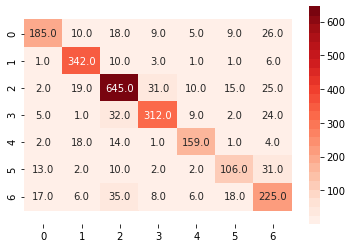

-------------------


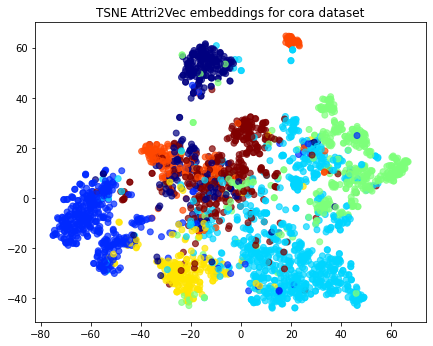

In [16]:
x_inp,x_out=createAndTrain_Att2Vec(4,5,50,4,128)
evalutate_embeddings_Att2V(x_inp,x_out,50,0.7)

Si puo' ammirare un raggruppamento più discriminativo e quindi significativo, a conferma della bontà dell'algoritmo in esame.

## GraphSage

Adottando una prima implementazione speculare alla precedente (con Pooling Aggregator), si ottengono risultati in linea a quelli della prima fase; nonostante il dataset di appredimento sia stato ridotto e si sia adottata la 10 fold cross validation.

Certamente, il tutto si riflette anche nella rappresentazione ottenuta nel grafico sottostante.

link_classification: using 'ip' method to combine node embeddings into edge embeddings
Epoch 1/10
434/434 [==============================] - 47s 104ms/step - loss: 0.5890 - binary_accuracy: 0.7047
Epoch 2/10
434/434 [==============================] - 42s 95ms/step - loss: 0.5436 - binary_accuracy: 0.7597
Epoch 3/10
434/434 [==============================] - 40s 92ms/step - loss: 0.5380 - binary_accuracy: 0.7721
Epoch 4/10
434/434 [==============================] - 40s 91ms/step - loss: 0.5380 - binary_accuracy: 0.7807
Epoch 5/10
434/434 [==============================] - 40s 91ms/step - loss: 0.5349 - binary_accuracy: 0.7952
Epoch 6/10
434/434 [==============================] - 40s 91ms/step - loss: 0.5354 - binary_accuracy: 0.7925
Epoch 7/10
434/434 [==============================] - 41s 94ms/step - loss: 0.5345 - binary_accuracy: 0.7972
Epoch 8/10
434/434 [==============================] - 40s 91ms/step - loss: 0.5301 - binary_accuracy: 0.8028
Epoch 9/10
434/434 [====================

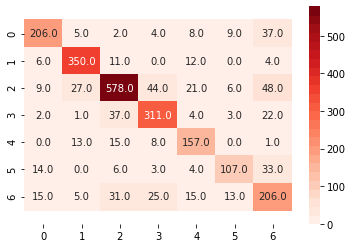

-------------------


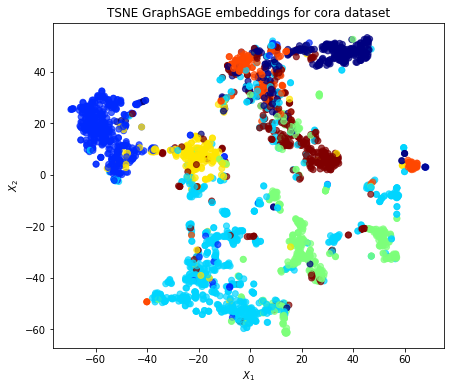

In [7]:
x_inp,x_out=createAndTrain_GraphSageModel(50,10,[10, 5],[50, 50])
evalutate_embeddings_GS(x_inp,x_out,50,[10, 5],0.7,1)

## GraphSageGCN

Si adotta ora la versione con aggregatore GCN e come preannunciato dalla teoria, le performance migliorano rispetto al classico approccio di GraphSage; ottenendo la migliore accuratezza e i migliori parametri sul dataset, in questa fase di analisi.

In [21]:
def createAndTrain_GCN(train_size,layer_sizes,dropout,epochs):
    train_subjects, test_subjects = model_selection.train_test_split(
        node_subjects, train_size=train_size,test_size=None, stratify=node_subjects
    )
    target_encoding = preprocessing.LabelBinarizer()
    train_targets = target_encoding.fit_transform(train_subjects)
    test_targets = target_encoding.transform(test_subjects)
    generator = FullBatchNodeGenerator(G, method="gcn")
    train_gen = generator.flow(train_subjects.index, train_targets)
    gcn = GCN(
        layer_sizes=layer_sizes, activations=["relu", "relu"], generator=generator, dropout=dropout
    )
    x_inp, x_out = gcn.in_out_tensors()
    predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)
    model = Model(inputs=x_inp, outputs=predictions)
    model.compile(
        optimizer=optimizers.Adam(lr=0.01),
        loss=losses.categorical_crossentropy,
        metrics=["acc"],
    )
    history = model.fit(
        train_gen,
        epochs=epochs,
        verbose=0,
        shuffle=False, 
    )
    return x_inp,x_out,generator


def evalutate_embeddings_GCN(x_inp,x_out,generator):
    embedding_model = keras.Model(inputs=x_inp, outputs=x_out)
    all_nodes = node_subjects.index
    all_gen = generator.flow(all_nodes)
    node_embeddings = embedding_model.predict(all_gen)
    X = node_embeddings.squeeze(0)
    y = np.array(node_subjects)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=None)
    clf = LogisticRegressionCV(Cs=10, cv=10, scoring="accuracy", verbose=False, multi_class="ovr", max_iter=700)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    print("Accuracy: ",score)
    print('-------------------')
    print(classification_report(y_test,y_pred))
    print('-------------------')
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f', cmap=sns.color_palette("Reds", 25))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('-------------------')
    transform = TSNE 
    trans = transform(n_components=2)
    X_reduced = trans.fit_transform(X)
    X_reduced.shape
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        c=node_subjects.astype("category").cat.codes,
        cmap="jet",
        alpha=0.7,
    )
    ax.set(
        aspect="equal",
        xlabel="$X_1$",
        ylabel="$X_2$",
        title=f"{transform.__name__} visualization of GCN embeddings for cora dataset",
    )

Using GCN (local pooling) filters...
Accuracy:  0.8392124692370796
-------------------
                        precision    recall  f1-score   support

            Case_Based       0.83      0.83      0.83       271
    Genetic_Algorithms       0.90      0.94      0.92       373
       Neural_Networks       0.85      0.89      0.87       736
 Probabilistic_Methods       0.87      0.78      0.82       384
Reinforcement_Learning       0.83      0.81      0.82       200
         Rule_Learning       0.80      0.81      0.80       159
                Theory       0.73      0.72      0.73       315

              accuracy                           0.84      2438
             macro avg       0.83      0.82      0.83      2438
          weighted avg       0.84      0.84      0.84      2438

-------------------


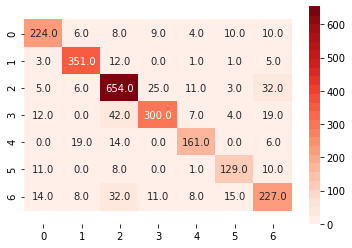

-------------------


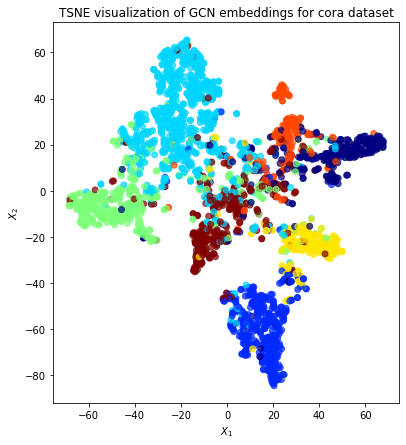

In [12]:
x_inp,x_out,generator=createAndTrain_GCN(0.1,[16, 16],0.5,25)
evalutate_embeddings_GCN(x_inp,x_out,generator)

Si noti come questo algoritmo rappresenti in maniera quasi ottimale l'aggregazione dei nodi in base all'etichetta.

# Fase 3: Node2Vec (Stellargraph) vs Attri2Vec vs GraphSage vs GraphSageGCN per la previsione dei Link

Si verifica ora il comportamento degli algoritmi precedenti nella previsione dei link per i nodi in esame.
Si precisa che, a differenza dei settaggi precedenti e su consiglio della stessa libreria stellargraph, in questa fase vengono utilizzati i medesimi settaggi dei parametri comuni tra tutti gli algoritmi.

Il dataset viene ricaricato con opportune modifiche e diviso come mostrato dal dataframe in basso.

In [8]:
dataset = datasets.Cora()
display(HTML(dataset.description))
graph, _ = dataset.load(largest_connected_component_only=True, str_node_ids=True)
edge_splitter_test = EdgeSplitter(graph)
graph_test, examples_test, labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global"
)
edge_splitter_train = EdgeSplitter(graph_test)
graph_train, examples, labels = edge_splitter_train.train_test_split(
    p=0.1, method="global"
)
(
    examples_train,
    examples_model_selection,
    labels_train,
    labels_model_selection,
) = train_test_split(examples, labels, train_size=0.8, test_size=0.2)

pd.DataFrame(
    [
        (
            "Training Set",
            len(examples_train),
            "Train Graph",
            "Test Graph",
            "Train the Link Classifier",
        ),
        (
            "Model Selection",
            len(examples_model_selection),
            "Train Graph",
            "Test Graph",
            "Select the best Link Classifier model",
        ),
        (
            "Test set",
            len(examples_test),
            "Test Graph",
            "Full Graph",
            "Evaluate the best Link Classifier",
        ),
    ],
    columns=("Split", "Number of Examples", "Hidden from", "Picked from", "Use"),
).set_index("Split")

** Sampled 520 positive and 520 negative edges. **
** Sampled 468 positive and 468 negative edges. **


,Number of Examples,Hidden from,Picked from,Use
Split,,,,
Training Set,748,Train Graph,Test Graph,Train the Link Classifier
Model Selection,188,Train Graph,Test Graph,Select the best Link Classifier model
Test set,1040,Test Graph,Full Graph,Evaluate the best Link Classifier


Anche i metodo sottostanti, sono implementati seguendo le indicazioni della libreria utilizzata.

In [24]:
walk_length = 5
epochs = 6
batch_size = 50


def create_biased_random_walker(graph, walk_num, walk_length):
    p = 1.0
    q = 1.0
    return BiasedRandomWalk(graph, n=walk_num, length=walk_length, p=p, q=q)

Si adotterà, anche in questa fase, una 10 fold cross validation su una regressione logistica; al fine di garantire l'affidabilità dei risultati prodotti.

Lo scoring utilizzato è, però, il roc_auc.

Si calcolano gli embedding di link/edge per i campioni degli archi positivi e negativi applicando un operatore binario.

Si addestra un classificatore di regressione logistica per prevedere un valore (binario) che indica se deve esistere o meno un arco tra due nodi e si valutano le prestazioni del classificatore dei link tramite gli operatori Hadamard,L1,L2 e media sui dati di addestramento.

In [25]:
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node(src), transform_node(dst))
        for src, dst in link_examples
    ]

def train_link_prediction_model(
    link_examples, link_labels, get_embedding, binary_operator
):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf


def link_prediction_classifier(max_iter=5000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])



def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator
    )
    score = evaluate_roc_auc(clf, link_features_test, link_labels_test)
    return score


def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

def operator_hadamard(u, v):
    return u * v


def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0


def run_link_prediction(binary_operator, embedding_train):
    clf = train_link_prediction_model(
        examples_train, labels_train, embedding_train, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_model_selection,
        labels_model_selection,
        embedding_train,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }

In [26]:
def train_and_evaluate(embedding, name):
    embedding_train = embedding(graph_train, "Train Graph")
    results = [run_link_prediction(op, embedding_train) for op in binary_operators]
    best_result = max(results, key=lambda result: result["score"])
    
    train_score= pd.DataFrame(
        [(result["binary_operator"].__name__, result["score"]) for result in results],columns=("name", "ROC AUC"),).set_index("name")
    
    test_score = evaluate_link_prediction_model(
        best_result["classifier"],
        examples_test,
        labels_test,
        embedding_train,
        best_result["binary_operator"],
    )

    return train_score,test_score

In [27]:
binary_operators = [operator_hadamard, operator_l1, operator_l2, operator_avg]

In [28]:
from stellargraph.layer import Node2Vec, link_classification
def node2vec_embedding(graph, name):
    dimension = 128
    walk_number = 20
    graph_node_list = list(graph.nodes())
    walker = create_biased_random_walker(graph, walk_number, 3)
    unsupervised_samples = UnsupervisedSampler(
        graph, nodes=graph_node_list, walker=walker
    )
    generator = Node2VecLinkGenerator(graph, batch_size)
    node2vec = Node2Vec(dimension, generator=generator)
    x_inp, x_out = node2vec.in_out_tensors()
    prediction = link_classification(
        output_dim=1, output_act="sigmoid", edge_embedding_method="dot"
    )(x_out)
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy],
    )
    model.fit(
        generator.flow(unsupervised_samples),
        epochs=epochs,
        verbose=0,
        use_multiprocessing=False,
        workers=4,
        shuffle=True,
    )
    
    x_inp_src = x_inp[0]
    x_out_src = x_out[0]
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_gen = Node2VecNodeGenerator(graph, batch_size).flow(graph_node_list)
    node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=0)

    def get_embedding(u):
        u_index = graph_node_list.index(u)
        return node_embeddings[u_index]
    
    return get_embedding

In [29]:
def attri2vec_embedding(graph, name):
    dimension = [128]
    walk_number = 4
    graph_node_list = list(graph.nodes())
    walker = create_biased_random_walker(graph, walk_number, walk_length)
    unsupervised_samples = UnsupervisedSampler(
        graph, nodes=graph_node_list, walker=walker
    )
    generator = Attri2VecLinkGenerator(graph, batch_size)
    attri2vec = Attri2Vec(
        layer_sizes=dimension, generator=generator, bias=False, normalize=None
    )
    x_inp, x_out = attri2vec.in_out_tensors()
    prediction = link_classification(
        output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
    )(x_out)
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy],
    )
    model.fit(
        generator.flow(unsupervised_samples),
        epochs=epochs,
        verbose=0,
        use_multiprocessing=False,
        workers=1,
        shuffle=True,
    )
    x_inp_src = x_inp[0]
    x_out_src = x_out[0]
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_gen = Attri2VecNodeGenerator(graph, batch_size).flow(graph_node_list)
    node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=0)

    def get_embedding(u):
        u_index = graph_node_list.index(u)
        return node_embeddings[u_index]

    return get_embedding

In [30]:
def graphsage_embedding(graph, name):
    dimensions = [128, 128]
    num_samples = [10, 5]
    walk_number = 1
    graph_node_list = list(graph.nodes())
    walker = create_biased_random_walker(graph, walk_number, walk_length)
    unsupervised_samples = UnsupervisedSampler(
        graph, nodes=graph_node_list, walker=walker
    )
    generator = GraphSAGELinkGenerator(graph, batch_size, num_samples)
    graphsage = GraphSAGE(
        layer_sizes=dimensions,
        generator=generator,
        bias=True,
        dropout=0.0,
        normalize="l2",
    )
    x_inp, x_out = graphsage.in_out_tensors()
    prediction = link_classification(
        output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
    )(x_out)
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy],
    )
    model.fit(
        generator.flow(unsupervised_samples),
        epochs=epochs,
        verbose=0,
        use_multiprocessing=False,
        workers=4,
        shuffle=True,
    )
    x_inp_src = x_inp[0::2]
    x_out_src = x_out[0]
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_gen = GraphSAGENodeGenerator(graph, batch_size, num_samples).flow(
        graph_node_list
    )
    node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=0)

    def get_embedding(u):
        u_index = graph_node_list.index(u)
        return node_embeddings[u_index]

    return get_embedding

In [31]:
def gcn_embedding(graph, name):
    dimensions = [128, 128]
    walk_number = 1
    graph_node_list = list(graph.nodes())
    walker = create_biased_random_walker(graph, walk_number, walk_length)
    unsupervised_samples = UnsupervisedSampler(
        graph, nodes=graph_node_list, walker=walker
    )
    generator = FullBatchLinkGenerator(graph, method="gcn")
    gcn = GCN(
        layer_sizes=dimensions,
        activations=["relu", "relu"],
        generator=generator,
        dropout=0.3,
    )
    x_inp, x_out = gcn.in_out_tensors()
    prediction = LinkEmbedding(activation="sigmoid", method="ip")(x_out)
    prediction = keras.layers.Reshape((-1,))(prediction)
    model = keras.Model(inputs=x_inp, outputs=prediction)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=[keras.metrics.binary_accuracy],
    )
    batches = unsupervised_samples.run(batch_size)
    for epoch in range(epochs):
        batch_iter = 1
        for batch in batches:
            samples = generator.flow(batch[0], targets=batch[1], use_ilocs=True)[0]
            [loss, accuracy] = model.train_on_batch(x=samples[0], y=samples[1])
            batch_iter = batch_iter + 1
    embedding_model = keras.Model(inputs=x_inp, outputs=x_out)
    node_embeddings = embedding_model.predict(
        generator.flow(list(zip(graph_node_list, graph_node_list)))
    )
    node_embeddings = node_embeddings[0][:, 0, :]

    def get_embedding(u):
        u_index = graph_node_list.index(u)
        return node_embeddings[u_index]

    return get_embedding

In [32]:
node2vecT_result,node2vec_result = train_and_evaluate(node2vec_embedding, "Node2Vec")
attri2vecT_result,attri2vec_result = train_and_evaluate(attri2vec_embedding, "Attri2Vec")
graphsageT_result,graphsage_result = train_and_evaluate(graphsage_embedding, "GraphSAGE")
gcnT_result,gcn_result = train_and_evaluate(gcn_embedding, "GCN")

link_classification: using 'dot' method to combine node embeddings into edge embeddings
link_classification: using 'ip' method to combine node embeddings into edge embeddings
link_classification: using 'ip' method to combine node embeddings into edge embeddings
Using GCN (local pooling) filters...


Viene scelto in base all'andamento sul set di apprendimento ai fini della fase di testing, l'operatore L2 per Node2Vec e GraphSage, l'operatore L1 per Attri2vec e quello Hadamard per GraphSage GCN.

In [33]:
A=pd.merge(node2vecT_result,attri2vecT_result,on='name',suffixes=('_node2vec','_attri2vec'))
B=pd.merge(graphsageT_result,gcnT_result,on='name',suffixes=('_graphsage_result','_gcn_result'))
train_tab=pd.merge(A,B,on='name')
train_tab.head()

,ROC AUC_node2vec,ROC AUC_attri2vec,ROC AUC_graphsage_result,ROC AUC_gcn_result
name,,,,
operator_hadamard,0.684324,0.941596,0.932428,0.951669
operator_l1,0.718619,0.969666,0.932088,0.839276
operator_l2,0.758121,0.965931,0.936955,0.814941
operator_avg,0.556537,0.493039,0.491907,0.588455


L'algoritmo che si comporta meglio sulla previsione dei collegamenti è Attri2Vec, seguito da GraphSageGCN e GraphSage classico che sono quasi identici, nettamente dietro troviamo Node2Vec.

D'altronde, questo risultato è figlio dei meccanismi utilizzati da Attri2Vec che, per calcolare l'embedding dei nodi, effettua una mappatura più completa (lineare e non) sul loro contenuto.

Tutto questo viene effettuato in contemporanea al Random Walk, facendo in modo che nodi con contesto simile abbiano rappresentazione simile.

Nonostante GraphSage adotti per certi versi un comportamento abbastanza simile nella mappatura, le differenze implementative, nel contesto di previsione dei link, premiano Attri2Vec.

In [34]:
test_tab=pd.DataFrame([("Node2Vec", node2vec_result),("Attri2Vec", attri2vec_result),("GraphSAGE", graphsage_result),("GCN", gcn_result),],columns=("name", "ROC AUC TEST SET"),).set_index("name")
test_tab.head()

,ROC AUC TEST SET
name,
Node2Vec,0.698369
Attri2Vec,0.929956
GraphSAGE,0.896043
GCN,0.896176
